In [38]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

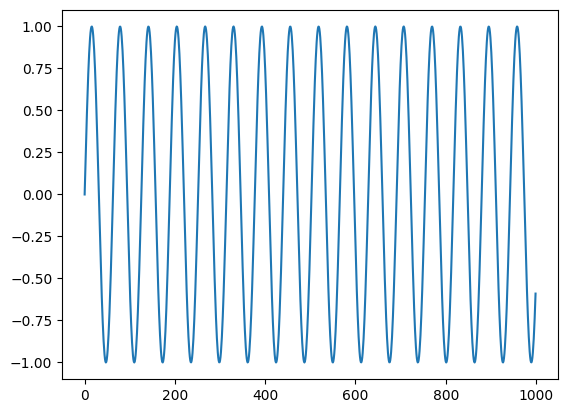

In [39]:
# make the original data
N = 1000
series = np.sin(0.1*np.arange(N))

# plot it
plt.plot(series)
plt.show()

In [40]:
T = 10
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y).reshape(-1, 1)
N = len(X)

print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (990, 10) Y.shape (990, 1)


In [41]:
### try autoregressive linear model
model = nn.Linear(T, 1)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

# Make inputs and targets
X_train = torch.from_numpy(X[:-N//2].astype(np.float32))
y_train = torch.from_numpy(Y[:-N//2].astype(np.float32))
X_test = torch.from_numpy(X[-N//2:].astype(np.float32))
y_test = torch.from_numpy(Y[-N//2:].astype(np.float32))

In [42]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", y_test.shape)

X_train shape: torch.Size([495, 10])
Y_train shape: torch.Size([495, 1])
X_test shape: torch.Size([495, 10])
Y_test shape: torch.Size([495, 1])


In [43]:
def full_gd(model, criterion, optimizer, X_train, y_train, X_test, y_test, epochs=200):
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)

    for i in range(epochs):
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        train_losses[i] = loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        y_test_pred = model(X_test)
        test_loss = criterion(y_test_pred, y_test)
        test_losses[i] = test_loss.item()

        if i % 5 == 0:
            print(f"Epoch {i+1}/{epochs}, Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}")

    return train_losses, test_losses

In [44]:
train_losses, test_losses = full_gd(model, criterion, optimizer, X_train, y_train, X_test, y_test)

Epoch 1/200, Loss: 0.3696, Test Loss: 0.1350
Epoch 6/200, Loss: 0.0648, Test Loss: 0.1102
Epoch 11/200, Loss: 0.0414, Test Loss: 0.0528
Epoch 16/200, Loss: 0.0308, Test Loss: 0.0417
Epoch 21/200, Loss: 0.0177, Test Loss: 0.0208
Epoch 26/200, Loss: 0.0092, Test Loss: 0.0128
Epoch 31/200, Loss: 0.0061, Test Loss: 0.0071
Epoch 36/200, Loss: 0.0056, Test Loss: 0.0057
Epoch 41/200, Loss: 0.0029, Test Loss: 0.0018
Epoch 46/200, Loss: 0.0020, Test Loss: 0.0010
Epoch 51/200, Loss: 0.0008, Test Loss: 0.0003
Epoch 56/200, Loss: 0.0003, Test Loss: 0.0002
Epoch 61/200, Loss: 0.0001, Test Loss: 0.0003
Epoch 66/200, Loss: 0.0002, Test Loss: 0.0002
Epoch 71/200, Loss: 0.0002, Test Loss: 0.0001
Epoch 76/200, Loss: 0.0000, Test Loss: 0.0000
Epoch 81/200, Loss: 0.0000, Test Loss: 0.0001
Epoch 86/200, Loss: 0.0000, Test Loss: 0.0000
Epoch 91/200, Loss: 0.0000, Test Loss: 0.0000
Epoch 96/200, Loss: 0.0000, Test Loss: 0.0000
Epoch 101/200, Loss: 0.0000, Test Loss: 0.0000
Epoch 106/200, Loss: 0.0000, Test L

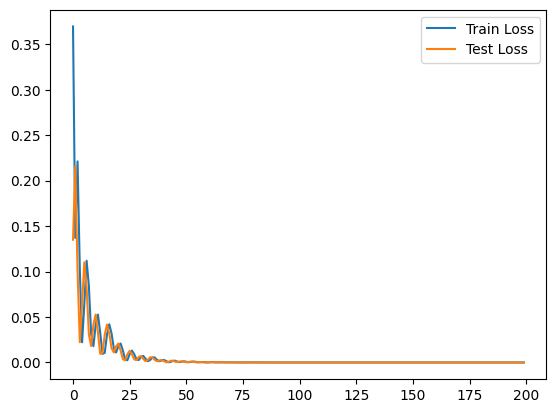

In [45]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.legend()
plt.show()